In [21]:

from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import os 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import pandas as pd
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import sys
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from pySankey.sankey import sankey
from wordcloud import WordCloud, STOPWORDS
import pickle
import utils
import plotly.express as px


In [22]:
#import cleaned data exploration csv  generated by data cleaning.py
final_clean = pd.read_csv('data/final_clean.csv')

# N Gram Analysis

#### Top Unigrams in Reliable News Data

<AxesSubplot:title={'center':'Top 20 words in reliable news '}, xlabel='clean_content'>

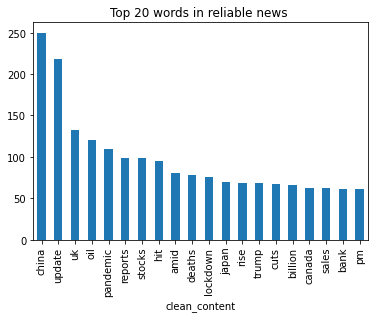

In [25]:
#Generate top unigrams in reliable news data

grouped = final_clean.groupby(final_clean.reliability)
true_df  = grouped.get_group(1)
false_df = grouped.get_group(0)
common_words = utils.get_top_n_words(true_df['clean_content'],20)
#for word, freq in common_words:
    #newStopWords.append(word)
true_df2 = pd.DataFrame(common_words, columns = ['clean_content' , 'count'])
pd.options.plotting.backend = "matplotlib"
true_df2.groupby('clean_content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 words in reliable news ')

#### Top Bigrams in Reliable News Data

<AxesSubplot:title={'center':'Top 20 bigrams in reliable news'}, xlabel='content'>

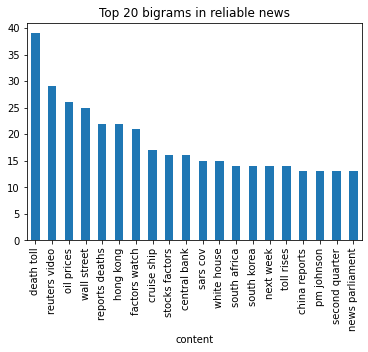

In [27]:
#Generate top bigrams in reliable news data

common_words = utils.get_top_n_bigram(true_df['clean_content'], 20)

true_df4 = pd.DataFrame(common_words, columns = ['content' , 'count'])
true_df4.groupby('content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 bigrams in reliable news')


#### Top Bigrams in Reliable News Data

<AxesSubplot:title={'center':'Top 20 trigrams in true news'}, xlabel='content'>

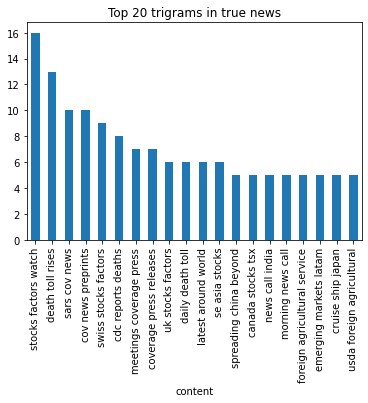

In [30]:
#Generate top trigrams in reliable news data

common_words = utils.get_top_n_trigram(true_df['clean_content'], 20)

true_df5 = pd.DataFrame(common_words, columns = ['content' , 'count'])
true_df5.groupby('content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 trigrams in true news')

#### Top Unigrams in Unreliable News Data

<AxesSubplot:title={'center':'Top 20 words in unreliable news'}, xlabel='content'>

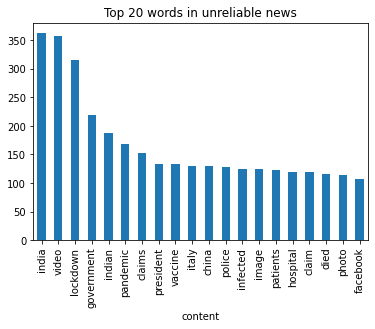

In [33]:
#Generate top unigrams in unreliable news data
common_words = utils.get_top_n_words(false_df['clean_content'],20)
false_df2 = pd.DataFrame(common_words, columns = ['content' , 'count'])
pd.options.plotting.backend = "matplotlib"
false_df2.groupby('content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 words in unreliable news')

#### Top Bigrams in Unreliable News Data

<AxesSubplot:title={'center':'Top 20 bigrams in Unreliable news'}, xlabel='content'>

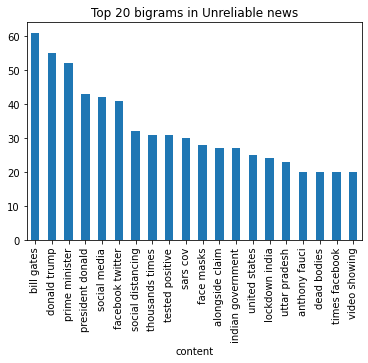

In [35]:
#Generate top bigrams in unreliable news data
common_words = utils.get_top_n_bigram(false_df['clean_content'], 20)
false_df4 = pd.DataFrame(common_words, columns = ['content' , 'count'])
false_df4.groupby('content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 bigrams in Unreliable news')

#### Top Trigrams in Unreliable News Data

<AxesSubplot:title={'center':'Top 20 trigrams in unreliable news'}, xlabel='content'>

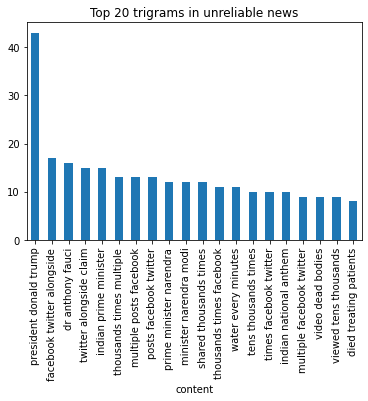

In [37]:
#Generate top trigrams in unreliable news data
common_words = utils.get_top_n_trigram(false_df['clean_content'], 20)
false_df5 = pd.DataFrame(common_words, columns = ['content' , 'count'])
false_df5.groupby('content').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='count', title='Top 20 trigrams in unreliable news')

#### Snakey Chart to display overlap in top Bigrams in Reliable and  Unreliable News Data

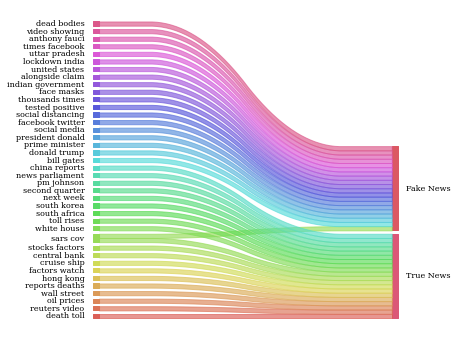

In [ ]:
#Generate Snakey Chart to display overlap between top fake and true news bigrams 
false_df4["Accuracy"] = "Fake News"
true_df4["Accuracy"] = "True News"
snake_graph = pd.concat([true_df4, false_df4], axis=0)
sankey(
    left=snake_graph["content"], right=snake_graph["Accuracy"], 
    aspect=2000, fontsize=8
)

## Topic Modeling 

In [ ]:
import topic_model as utils
#generating true and fake news corpus
grouped_df = utils.group_by_reliability(final_clean)
true_data = grouped_df.content[1]
false_data = grouped_df.content[0]
data_words_true = list(utils.sent_to_words(true_data))
data_words_false = list(utils.sent_to_words(false_data))
id2word_true = corpora.Dictionary(data_words_true)
true_texts = data_words_true
# Term Document Frequency
corpus_true = [id2word_true.doc2bow(text) for text in true_texts]
id2word_false = corpora.Dictionary(data_words_false)
false_texts = data_words_false
# Term Document Frequency
corpus_false = [id2word_false.doc2bow(text) for text in false_texts]

In [28]:
# Build LDA model on reliable news
num_topics = 10

true_lda_model = gensim.models.LdaMulticore(corpus=corpus_true,
                                       id2word=id2word_true,
                                       num_topics=num_topics)


num_topics = 10
# Build LDA  on unreliable news 
false_lda_model = gensim.models.LdaMulticore(corpus=corpus_false,
                                       id2word=id2word_false,
                                       num_topics=num_topics)


In [29]:
# Print the Keyword in the 10 reliable topics
pprint(true_lda_model.print_topics())
true_doc_lda = true_lda_model[corpus_true]

[(0,
  '0.009*"pandemic" + 0.008*"update" + 0.006*"fears" + 0.005*"oil" + '
  '0.004*"july" + 0.004*"low" + 0.004*"china" + 0.004*"data" + 0.004*"amid" + '
  '0.003*"output"'),
 (1,
  '0.012*"oil" + 0.008*"china" + 0.006*"economy" + 0.006*"travel" + '
  '0.006*"update" + 0.005*"uk" + 0.004*"fears" + 0.004*"hits" + 0.004*"news" + '
  '0.004*"output"'),
 (2,
  '0.011*"update" + 0.005*"stocks" + 0.005*"pandemic" + 0.004*"oil" + '
  '0.004*"fed" + 0.004*"quarter" + 0.004*"billion" + 0.003*"pm" + '
  '0.003*"warns" + 0.003*"demand"'),
 (3,
  '0.009*"china" + 0.009*"update" + 0.007*"reports" + 0.006*"hit" + '
  '0.006*"bank" + 0.005*"uk" + 0.005*"brazil" + 0.004*"video" + 0.004*"rise" + '
  '0.004*"sales"'),
 (4,
  '0.011*"canada" + 0.006*"oil" + 0.006*"stocks" + 0.005*"japan" + '
  '0.005*"reports" + 0.005*"rise" + 0.004*"china" + 0.004*"update" + '
  '0.004*"pandemic" + 0.004*"million"'),
 (5,
  '0.022*"china" + 0.009*"update" + 0.008*"pandemic" + 0.005*"hit" + '
  '0.004*"deaths" + 0.004*

In [30]:
# Print the Keyword in the 10 unreliable topics
pprint(false_lda_model.print_topics())
false_doc_lda = false_lda_model[corpus_false]

[(0,
  '0.011*"video" + 0.009*"india" + 0.008*"lockdown" + 0.008*"government" + '
  '0.007*"italy" + 0.007*"indian" + 0.006*"flu" + 0.005*"minister" + '
  '0.004*"spain" + 0.004*"president"'),
 (1,
  '0.013*"video" + 0.010*"india" + 0.008*"cure" + 0.006*"trump" + 0.005*"died" '
  '+ 0.005*"pandemic" + 0.005*"infected" + 0.005*"china" + 0.004*"claims" + '
  '0.004*"government"'),
 (2,
  '0.015*"video" + 0.011*"india" + 0.010*"president" + 0.010*"lockdown" + '
  '0.009*"trump" + 0.006*"claim" + 0.006*"donald" + 0.006*"spain" + '
  '0.006*"government" + 0.006*"pandemic"'),
 (3,
  '0.008*"video" + 0.007*"infected" + 0.007*"india" + 0.007*"chinese" + '
  '0.007*"vaccine" + 0.006*"indian" + 0.006*"kill" + 0.006*"government" + '
  '0.006*"italy" + 0.005*"lockdown"'),
 (4,
  '0.011*"lockdown" + 0.006*"video" + 0.006*"china" + 0.006*"india" + '
  '0.005*"country" + 0.005*"patients" + 0.004*"pandemic" + 0.004*"vaccine" + '
  '0.004*"help" + 0.004*"masks"'),
 (5,
  '0.010*"government" + 0.008*"lo

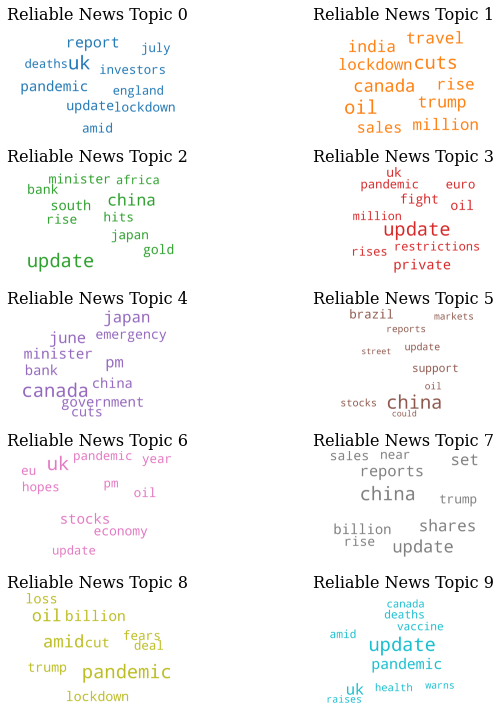

In [ ]:
#visualise true news topics 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = true_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Reliable News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

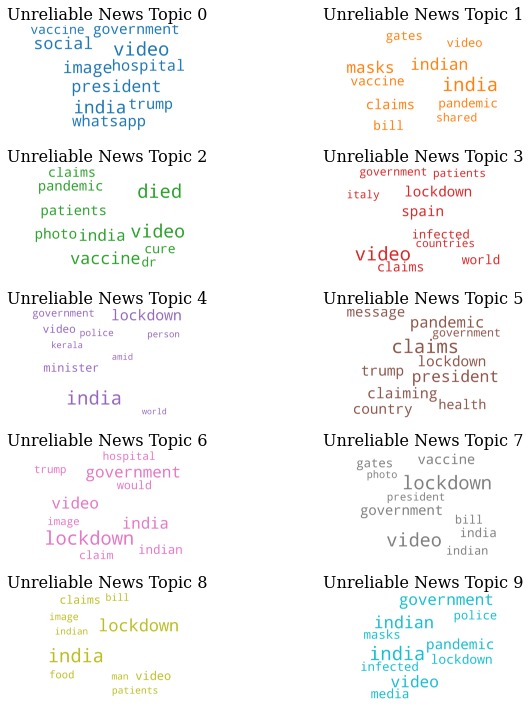

In [ ]:
#visualise fake news topics 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = false_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Unreliable News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Intertopic Distance Map For Reliable News

In [37]:
utils.generate_lda_graph(10,true_lda_model,corpus_true,id2word_true)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.070392 -0.017361       1        1  11.365915
7     -0.021223  0.025573       2        1  11.098567
0      0.013671  0.025975       3        1  10.980451
3     -0.062521 -0.045464       4        1  10.617074
5     -0.075482  0.008175       5        1  10.024755
1      0.014834  0.015386       6        1   9.895601
4     -0.009400  0.045411       7        1   9.791646
8      0.079308 -0.100300       8        1   9.341588
9      0.052389 -0.058099       9        1   9.253999
2      0.078816  0.100705      10        1   7.630404, topic_info=          Term        Freq       Total Category  logprob  loglift
107      china  192.000000  192.000000  Default  30.0000  30.0000
195     canada   48.000000   48.000000  Default  29.0000  29.0000
162        oil   94.000000   94.000000  Default  28.0000  28.0000
21    pandemic   87.000000   87.000000  Default  27.0000  27.0000
82       fight   36.000000   36.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
269   business    3.791211   26.805421  Topic10  -6.0954   0.6171
107      china    4.919604  192.052971  Topic10  -5.8349  -1.0915
1553      week    3.790810   34.442227  Topic10  -6.0955   0.3663
810     profit    3.825224   41.554171  Topic10  -6.0865   0.1876
597    support    3.790666   37.133247  Topic10  -6.0955   0.2911

[824 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
261       4  0.115340     abe
261       5  0.230679     abe
261       6  0.346019     abe
261       8  0.115340     abe
261      10  0.115340     abe
...     ...       ...     ...
27        6  0.042304    york
27        7  0.084608    york
27        8  0.084608    york
27        9  0.423038    york
1326      8  0.639148  zlotys

[2291 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 1, 4, 6, 2, 5, 9, 10, 3])

#### Intertopic Distance Map For Unreliable News

In [38]:
utils.generate_lda_graph(10,false_lda_model,corpus_false,id2word_false)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.053007  0.065522       1        1  14.954560
7     -0.006531  0.030583       2        1  11.740560
6      0.009013  0.008735       3        1  10.637858
1      0.018046  0.051397       4        1   9.824625
4     -0.009849 -0.008529       5        1   9.206975
3      0.074603 -0.098763       6        1   9.026599
9      0.075773  0.007298       7        1   9.012283
8      0.041347  0.049146       8        1   8.679760
5     -0.098945 -0.042245       9        1   8.482479
0     -0.050451 -0.063144      10        1   8.434301, topic_info=          Term        Freq       Total Category  logprob  loglift
37       china   98.000000   98.000000  Default  30.0000  30.0000
413      italy  100.000000  100.000000  Default  29.0000  29.0000
135      trump   85.000000   85.000000  Default  28.0000  28.0000
16       video  272.000000  272.000000  Default  27.0000  27.0000
33   president  106.000000  106.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
74      police    7.063260   97.603834  Topic10  -5.8825  -0.1531
203     claims    7.421539  121.055317  Topic10  -5.8330  -0.3190
595    vaccine    7.064062  104.685687  Topic10  -5.8824  -0.2231
547     health    6.419795   75.537637  Topic10  -5.9780   0.0076
81    facebook    6.435278   83.013266  Topic10  -5.9756  -0.0843

[823 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2105      4  0.420698       able
2105      7  0.140233       able
2105      8  0.140233       able
2105      9  0.280465       able
5777      4  0.627657  absorbion
...     ...       ...        ...
1488      9  0.085219      young
1488     10  0.085219      young
6035      6  0.727529      zones
2677      1  0.239884    zoology
2677      6  0.479767    zoology

[2273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 7, 2, 5, 4, 10, 9, 6, 1])